In [1]:
import requests
from urllib import request
from shutil import copyfileobj
import pandas as pd
import urllib3
from bs4 import BeautifulSoup
import numpy as np
from projet_final_function import *
import matplotlib.pyplot as plt

/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/xlwings/pro/utils.py:148: UserWarning: Your license key expires in 26 days.
  warnings.warn(


In [2]:
url = "https://www.vendeeglobe.org/fr/classement/20210305_080000"
url_base = "https://www.vendeeglobe.org/fr/classement/"
file_base = "vendeeglobe_"

In [3]:
soup = BeautifulSoup(requests.get(url).content)
list_classement = []

In [4]:
hist_class_soup = soup.find_all('option')
for i in hist_class_soup[1:]:
    class_=i.text.replace('-',"").replace(":","")[1:].replace(" ","_")
    list_classement.append(class_)


In [5]:
prem_classement = "vendeeglobe_20201108_210000"
der_class = "vendeeglobe_20210305_040000"

In [ ]:
url_base = "https://www.vendeeglobe.org/download-race-data/"
data_path = "/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/"

df_all = pd.DataFrame()

for i in list_classement:
    file_class_name = file_base + i + ".xlsx"
    url_class = url_base + file_class_name’

    response = requests.get(url_class)
    open(file_class_name, "wb").write(response.content)


    with xw.Book(data_path+file_class_name, mode="r") as book:
        sheet1 = book.sheets[0]
        data = sheet1.cells.value
        df = pd.DataFrame(data).drop(0).replace('\r', '', regex=True).reset_index().drop('index', axis=1)
        df.to_csv(data_path+file_base+i)

In [6]:
list_classement

['20210305_080000',
 '20210305_040000',
 '20210304_210000',
 '20210304_170000',
 '20210304_140000',
 '20210304_110000',
 '20210304_080000',
 '20210304_040000',
 '20210303_210000',
 '20210303_170000',
 '20210303_140000',
 '20210303_110000',
 '20210303_080000',
 '20210303_040000',
 '20210302_210000',
 '20210302_170000',
 '20210302_140000',
 '20210302_110000',
 '20210302_080000',
 '20210302_040000',
 '20210301_210000',
 '20210301_170000',
 '20210301_140000',
 '20210301_110000',
 '20210301_080000',
 '20210301_040000',
 '20210228_210000',
 '20210228_170000',
 '20210228_140000',
 '20210228_110000',
 '20210228_080000',
 '20210228_040000',
 '20210227_210000',
 '20210227_170000',
 '20210227_140000',
 '20210227_110000',
 '20210227_080000',
 '20210227_040000',
 '20210226_210000',
 '20210226_170000',
 '20210226_140000',
 '20210226_110000',
 '20210226_080000',
 '20210226_040000',
 '20210225_210000',
 '20210225_170000',
 '20210225_140000',
 '20210225_110000',
 '20210225_080000',
 '20210225_040000',


In [27]:
len(list_classement)-list_classement.index('20210127_170000')

487

In [7]:
j=0
for i in list_classement[1:-5]:
    try:
        if j==0:
            df_0=extract_inrace(file_base+i,"/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/")
            df_all = prep_df_(df_0)
        else:
            df=extract_inrace(file_base+i,"/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/")

            df=prep_df_(df)

            df_all=df_all.append(df)
    except:
        print(i)
    j=j+1



/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_79408/2774985936.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t39

In [8]:
df_all

,Rang,Heure FR,Latitude,Longitude,Depuis 30 minutes - Cap,Depuis 30 minutes - Vitesse,Depuis 30 minutes - VMG,Depuis 30 minutes - Distance,Depuis le dernier classement - Cap,Depuis le dernier classement - Vitesse,...,Depuis 24 heures - Vitesse,Depuis 24 heures - VMG,Depuis 24 heures - Distance,DTF,DTL,Date,Nationalité,Voile,Skipper,Bateau
0,25,04:30 FR,46.713500,-2.432000,128,11.4,11.3,1.0,115,8.9,...,6.7,6.7,161.5,30.6,0.0,2021-03-05 04:00:00,FIN,222,Ari Huusela,Stark
0,25,21:30 FR,47.140667,-3.815000,107,8.7,8.6,4.4,94,9.1,...,7.1,6.9,170.9,92.7,0.0,2021-03-04 21:00:00,FIN,222,Ari Huusela,Stark
0,25,17:30 FR,47.182167,-4.706000,94,10.0,9.7,5.0,94,8.7,...,7.2,6.9,172.2,127.4,0.0,2021-03-04 17:00:00,FIN,222,Ari Huusela,Stark
0,25,14:30 FR,47.213667,-5.344833,106,6.7,6.7,3.4,69,3.5,...,7.4,7.1,178.8,152.8,0.0,2021-03-04 14:00:00,FIN,222,Ari Huusela,Stark
0,25,11:30 FR,47.151833,-5.585167,19,5.7,0.5,2.8,28,7.6,...,8.2,7.9,196.5,161.4,0.0,2021-03-04 11:00:00,FIN,222,Ari Huusela,Stark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,05:30 FR,46.275167,-5.612667,268,11.5,7.8,5.8,270,9.8,...,7.5,6.9,158.9,24166.2,33.2,2020-11-09 04:00:00,FRA,72,Alexia Barrier,TSE - 4myplanet
29,30,05:30 FR,45.925333,-4.923667,280,9.0,5.7,4.5,267,6.9,...,5.7,5.6,134.8,24171.7,38.6,2020-11-09 04:00:00,FIN,222,Ari Huusela,Stark
30,31,05:30 FR,45.860333,-4.822000,281,8.1,5.2,4.0,270,6.3,...,5.6,5.5,131.8,24172.4,39.4,2020-11-09 04:00:00,FRA,83,Clement Giraud,Compagnie du lit - Jiliti
31,32,05:30 FR,46.390500,-5.530667,269,11.8,7.8,5.9,282,9.8,...,6.6,5.9,154.9,24173.7,40.6,2020-11-09 04:00:00,FRFRA,69,Sebastien Destremau,Merci


In [15]:
inf_voil = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/infos_voiliers')
df_complet = pd.merge(df_all, inf_voil, on = 'Skipper', how='outer')

In [16]:
df_complet.to_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/dataset_complet')

In [17]:
#df_complet = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/dataset_complet').drop('Unnamed: 0.1', axis=1)
df_complet

,Rang,Heure FR,Latitude,Longitude,Depuis 30 minutes - Cap,Depuis 30 minutes - Vitesse,Depuis 30 minutes - VMG,Depuis 30 minutes - Distance,Depuis le dernier classement - Cap,Depuis le dernier classement - Vitesse,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,25.0,04:30 FR,46.713500,-2.432000,128.0,11.4,11.3,1.0,115.0,8.9,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270.0,580.0
1,25.0,21:30 FR,47.140667,-3.815000,107.0,8.7,8.6,4.4,94.0,9.1,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270.0,580.0
2,25.0,17:30 FR,47.182167,-4.706000,94.0,10.0,9.7,5.0,94.0,8.7,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270.0,580.0
3,25.0,14:30 FR,47.213667,-5.344833,106.0,6.7,6.7,3.4,69.0,3.5,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270.0,580.0
4,25.0,11:30 FR,47.151833,-5.585167,19.0,5.7,0.5,2.8,28.0,7.6,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270.0,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15223,19.0,09:00 FR,46.910167,-8.574833,281.0,7.6,1.5,3.8,299.0,13.8,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270.0,535.0
15224,5.0,05:30 FR,46.511667,-7.553667,293.0,16.3,0.1,8.1,278.0,14.7,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270.0,535.0
15225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20 Septembre 2010,18.28,5.7,4.5,7.8,foils,27.0,acier forgé,300.0,600.0
15226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,01 Août 2007,18.28,5.9,4.5,0.0,foils,27.0,carbone,290.0,580.0


In [18]:
test=df_complet.loc[df_complet['Skipper']== 'Yannick Bestaven']
test['Date']

12631   2021-01-27 17:00:00
12632   2021-01-27 14:00:00
12633   2021-01-27 11:00:00
12634   2021-01-27 08:00:00
12635   2021-01-27 04:00:00
                ...        
13108   2020-11-09 17:00:00
13109   2020-11-09 14:00:00
13110   2020-11-09 11:00:00
13111   2020-11-09 08:00:00
13112   2020-11-09 04:00:00
Name: Date, Length: 482, dtype: datetime64[ns]

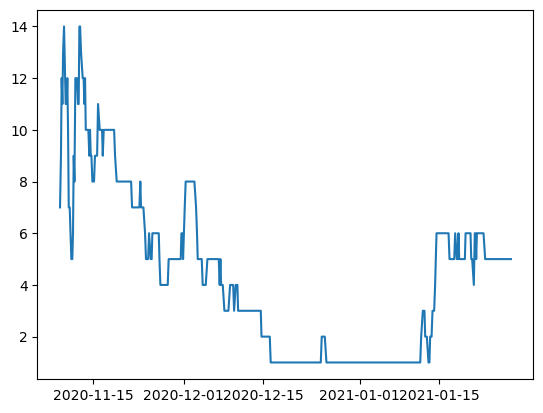

In [19]:
plt.plot(test['Date'],test['Rang'])

Calcul de la corrélation:

In [20]:
df_complet.groupby('Skipper')['Rang'].mean()

Skipper
Alex Thomson             7.519737
Alexia Barrier          24.784195
Ari Huusela             25.925980
Armel Tripon            16.165323
Arnaud Boissieres       17.452424
Benjamin Dutreux         7.473904
Boris Herrmann           6.945032
Charlie Dalin            2.285106
Clarisse Cremer         13.475538
Clement Giraud          24.296422
Damien Seguin            6.360759
Didac Costa             19.921329
Fabrice Amedeo          27.122449
Giancarlo Pedote        10.369198
Isabelle Joschke        11.521978
Jean Le Cam              5.569328
Jeremie Beyou           21.647059
Kevin Escoffier          5.661654
Kojiro Shiraishi        22.148479
Louis Burton             6.721868
Manuel Cousin           21.268852
Maxime Sorel            10.677686
Miranda Merron          23.504188
Nicolas Troussel         7.152174
Pip Hare                19.229537
Romain Attanasio        13.361059
Sebastien Destremau     27.918519
Sebastien Simon         10.298701
Stephane Le Diraison    17.800357
Thomas

In [21]:
df_complet.groupby('Skipper')['Depuis 30 minutes - Distance'].mean()

Skipper
Alex Thomson            7.038158
Alexia Barrier          5.282371
Ari Huusela             5.179390
Armel Tripon            6.902621
Arnaud Boissieres       6.272172
Benjamin Dutreux        7.324426
Boris Herrmann          7.322199
Charlie Dalin           7.503404
Clarisse Cremer         6.624462
Clement Giraud          5.905111
Damien Seguin           7.072785
Didac Costa             5.987413
Fabrice Amedeo          5.494898
Giancarlo Pedote        7.401688
Isabelle Joschke        7.072802
Jean Le Cam             7.009664
Jeremie Beyou           6.841746
Kevin Escoffier         7.308271
Kojiro Shiraishi        6.346512
Louis Burton            7.415711
Manuel Cousin           5.882459
Maxime Sorel            6.859298
Miranda Merron          5.698325
Nicolas Troussel        6.336957
Pip Hare                6.098399
Romain Attanasio        6.340643
Sebastien Destremau     4.879753
Sebastien Simon         7.078571
Stephane Le Diraison    6.204635
Thomas Ruyant           7.674153
Ya

In [22]:
np.corrcoef(df_complet.groupby('Skipper')['Rang'].mean().values, df_complet.groupby('Skipper')['Depuis 30 minutes - Distance'].mean().values)

array([[ 1.      , -0.899215],
       [-0.899215,  1.      ]])

Affichage le parcours des skippers lors de la course

In [20]:
alex_thompson=df_complet.loc[df_complet['Skipper']== 'Yannick Bestaven'].sort_values('Date')
geo_p_alex_thompson = alex_thompson[['Latitude', 'Longitude', 'Date']]

In [21]:
geo_p_alex_thompson

,Latitude,Longitude,Date
13112,46.246667,-6.652667,2020-11-09 04:00:00
13111,46.450833,-7.633500,2020-11-09 08:00:00
13110,46.410667,-8.075000,2020-11-09 11:00:00
13109,46.003333,-8.294000,2020-11-09 14:00:00
13108,45.599333,-8.697000,2020-11-09 17:00:00
...,...,...,...
12635,47.874000,-12.467000,2021-01-27 04:00:00
12634,47.889500,-10.551833,2021-01-27 08:00:00
12633,47.843500,-9.317167,2021-01-27 11:00:00
12632,47.723000,-7.980167,2021-01-27 14:00:00


In [22]:
from ipyleaflet import Map
# villes

# satellite map
from datetime import datetime, timedelta
from ipyleaflet import basemaps, basemap_to_tiles

import pandas as pd
from ipyleaflet import Marker, LayerGroup

In [35]:
watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

df2 = geo_p_alex_thompson
layers = []
j=0
for i, row in df2.iterrows():
    #print(row)
    marker = Marker(location=(row['Latitude'], row['Longitude']),
                    draggable=True,
                    title=str(row['Date']))
    layers.append(marker)
    j= j+1
    #print(j)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

In [36]:
m

Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

LayerGroup(layers=(Marker(draggable=False, location=[46.24666666666667, -6.652666666666667], options=['alt', '…